# Old faithful

This exercise gives you some hands-on practice with linear regression.

The exercise comes from the Summer 2017 [Berkeley course
materials](https://github.com/data-8/data8assets) with thanks.


In [5]:
# Run this cell, but please don't change it.
!pip install okpy

# These lines import the Numpy and Pandas modules.
import numpy as np
import pandas as pd

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines load the tests.
from client.api.notebook import Notebook
ok = Notebook('old_faithful.ok')

     |████████████████████████████████| 107 kB 3.4 MB/s eta 0:00:01
     |████████████████████████████████| 58 kB 3.9 MB/s eta 0:00:011
     |████████████████████████████████| 125 kB 5.0 MB/s eta 0:00:01
     |████████████████████████████████| 369 kB 22.0 MB/s eta 0:00:01
     |████████████████████████████████| 156 kB 13.2 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 14.7 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 69.9 MB/s eta 0:00:01
  Created wheel for ast-scope: filename=ast_scope-0.3.1-py3-none-any.whl size=15545 sha256=eb760c0dcd4161a55db16347c84bd2996fe1bf66df6a071dbe916ae34ea05a9f
  Stored in directory: /Users/Olsonac-admin/Library/Caches/pip/wheels/80/ad/dc/01f739a65f5a6d3a5de7550ad7920adc47da4a69ef29018ec2
  Created wheel for coverage: filename=coverage-4.4-cp38-cp38-macosx_10_9_x86_64.whl size=174520 sha256=dc6bc6da9289bf36896007fdf63c9a7d174f330baf642375984b1398ec0f7109
  Stored in directory: /Users/Olsonac-admin/Library/Caches/pip/whe

# 1. How Faithful is Old Faithful? 

(Note: clever title comes from [here](http://web.pdx.edu/~jfreder/M212/oldfaithful.pdf).)

Old Faithful is a geyser in Yellowstone National Park in the central United States.  It's famous for erupting on a fairly regular schedule.  You can see a video below.

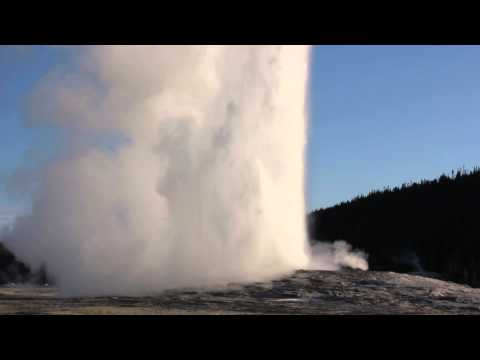

In [1]:
# For the curious: this is how to display a YouTube video in a
# Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the
# video.  For example, the full URL for this video is:
#   https://www.youtube.com/watch?v=wE8NDuzt8eg
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Some of Old Faithful's eruptions last longer than others.  When it has a long eruption, there's generally a longer wait until the next eruption.

If you visit Yellowstone, you might want to predict when the next eruption will happen, so you can see the rest of the park and come to see the geyser when it happens.  Today, we will use a dataset on eruption durations and waiting times to see if we can make such predictions accurately with linear regression.

The dataset has one row for each observed eruption.  It includes the following columns:

- **duration**: Eruption duration, in minutes
- **wait**: Time between this eruption and the next, also in minutes

Run the next cell to load the dataset.

In [6]:
faithful = pd.read_csv("faithful.csv")
faithful

,duration,wait
0,3.600,79.0
1,1.800,54.0
2,3.333,74.0
3,2.283,62.0
4,4.533,85.0
...,...,...
267,4.117,81.0
268,2.150,46.0
269,4.417,90.0
270,1.817,46.0


We would like to use linear regression to make predictions, but that
won't work well if the data aren't roughly linearly related.  To check
that, we should look at the data.


## Question 1

Make a scatter plot of the data.  It's conventional to put the column we will try to predict on the vertical axis and the other column on the horizontal axis.

<AxesSubplot:xlabel='duration', ylabel='wait'>

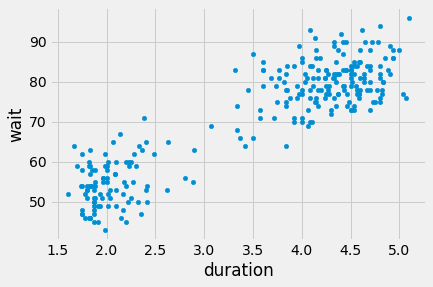

In [7]:
#<- ...
faithful.plot.scatter('duration', 'wait')

## Question 2

Look at the scatter plot. Do eruption duration and waiting time have
a rough straight line relationship?

*Write your answer here, replacing this text.*

We're going to continue with the provisional assumption that they are
linearly related, so it's reasonable to use linear regression to analyze
this data.

We'd next like to plot the data in standard units.  Recall that, if
`nums` is an array of numbers, then

    (nums - np.mean(nums)) / np.std(nums)

...is an array of those numbers in standard units.


## Question 3

Compute the mean and standard deviation of the eruption durations and
waiting times.  **Then** create a Data Frame called `faithful_standard`
containing the eruption durations and waiting times in standard units.
(The columns should be named `"duration (standard units)"` and `"wait
(standard units)"`.

In [8]:
#<- duration_mean = ...
#<- duration_std = ...
#<- wait_mean = ...
#<- wait_std = ...
duration = faithful['duration']
wait = faithful['wait']
duration_mean = np.mean(duration)
duration_std = np.std(duration)
wait_mean = np.mean(wait)
wait_std = np.std(wait)

#<--
faithful_standard = pd.DataFrame()
#<- faithful_standard["duration (standard units)"] = ...
faithful_standard["duration (standard units)"] = (duration - duration_mean) / duration_std
#<- faithful_standard["wait (standard units)"] = ...
faithful_standard["wait (standard units)"] = (wait - wait_mean) / wait_std
#<->
# Show the new data frame.
faithful_standard

,duration (standard units),wait (standard units)
0,0.098499,0.597123
1,-1.481459,-1.245181
2,-0.135861,0.228663
3,-1.057503,-0.655644
4,0.917443,1.039277
...,...,...
267,0.552298,0.744508
268,-1.174245,-1.834719
269,0.815624,1.407737
270,-1.466537,-1.834719


In [9]:
ok.grade('q1_3');

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Question 4

Plot the data again, but this time in standard units.

<AxesSubplot:xlabel='duration (standard units)', ylabel='wait (standard units)'>

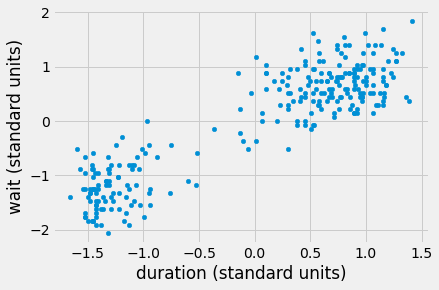

In [10]:
#<- ...
faithful_standard.plot.scatter('duration (standard units)', 'wait (standard units)')

You'll notice that this plot looks exactly the same as the last one!
The data really are different, but the axes are scaled differently.
(The method `scatter` scales the axes so the data fill up the available
space.)  So it's important to read the ticks on the axes.


## Question 5

Among the following numbers, which would you guess is closest to the
correlation between eruption duration and waiting time in this dataset?

* -1
* 0
* 1

*Write your answer here, replacing this text.*


## Question 6

*Compute* the correlation `r`.  *Hint:* Use `faithful_standard`. The Correlation section in the textbook explains how to do this.

In [11]:
#<- r = ... 
r = np.mean(faithful_standard['duration (standard units)'] *
            faithful_standard['wait (standard units)'])
#<->
r

0.9008111683218134

In [9]:
ok.grade('q1_6');

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## 2. The regression line

Recall that the correlation is the slope of the regression line when the
data are put in standard units.

The next cell plots the regression line in standard units:

$$\text{waiting time (standard units)} = r \times \text{eruption duration (standard units)}.$$

Then, it plots the original data again, for comparison.

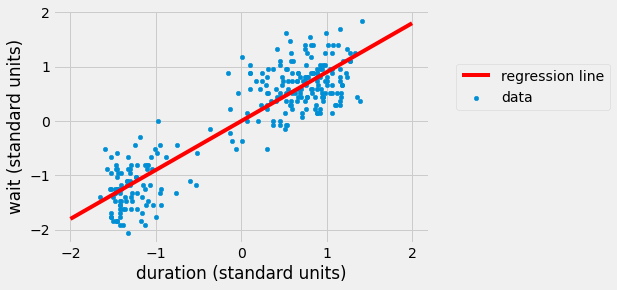

In [12]:
def plot_data_and_line(dataset, x, y, point_0, point_1):
    """Makes a scatter plot of the dataset, along with a line passing through two points."""
    dataset.plot.scatter(x, y, label="data")
    xs, ys = zip(point_0, point_1)
    plt.plot(xs, ys, label="regression line", color='red')
    plt.legend(bbox_to_anchor=(1.5,.8))

plot_data_and_line(faithful_standard,
                   "duration (standard units)",
                   "wait (standard units)",
                   [-2, -2*r],
                   [2, 2*r])

## Calculating the regression line

In fact, we can calculate the regression line for the original (not
standardized) data directly from the correlation.  If you are interested
in how this works, see [the regression chapter from the Berkeley
textbook](https://www.inferentialthinking.com/chapters/15/2/Regression_Line.html)

For now, we will just re-estimate the regression using `minimize` skills.  Here is the generic least-squares line function:

In [11]:
def ss_any_line(c_s, x_values, y_values):
    c, s = c_s
    predicted = c + x_values * s
    error = y_values - predicted
    return np.sum(error ** 2)

You will also need `scipy.optimize.minimize`

In [12]:
from scipy.optimize import minimize

Calculate the least-squares intercept and slope for the *original* duration and wait times (not standardized):

In [13]:
#<- intercept, slope = ...
intercept, slope = minimize(ss_any_line, [30, 10],
                            args=(faithful['duration'],
                                  faithful['wait'])).x
#<->
intercept, slope

(33.47439759609108, 10.729641218544451)

In [14]:
ok.grade('q2_1');

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed




## 3. Investigating the regression line


The slope and intercept tell you exactly what the regression line looks
like.  To predict the waiting time for an eruption, multiply the
eruption's duration by `slope` and then add `intercept`.


## Question 1

Compute the predicted waiting time for an eruption that lasts 2 minutes,
and for an eruption that lasts 5 minutes.

In [15]:
#<- two_minute_predicted_waiting_time = ...
two_minute_predicted_waiting_time = intercept + slope * 2
#<- five_minute_predicted_waiting_time = ...
five_minute_predicted_waiting_time = intercept + slope * 5

#<->
# Here is a helper function to print out your predictions
# (you don't need to modify it):
def print_prediction(duration, predicted_waiting_time):
    print("After an eruption lasting", duration,
          "minutes, we predict you'll wait", predicted_waiting_time,
          "minutes until the next eruption.")

print_prediction(2, two_minute_predicted_waiting_time)
print_prediction(5, five_minute_predicted_waiting_time)

After an eruption lasting 2 minutes, we predict you'll wait 54.93368003317998 minutes until the next eruption.
After an eruption lasting 5 minutes, we predict you'll wait 87.12260368881334 minutes until the next eruption.


The next cell plots the line that goes between those two points, which
is (a segment of) the regression line.

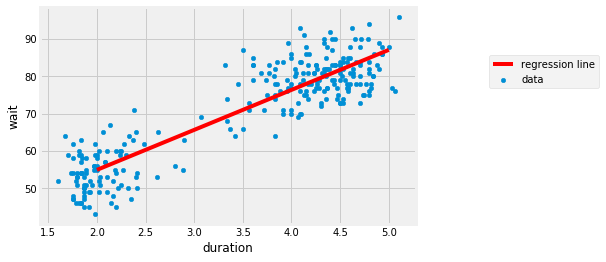

In [16]:
plot_data_and_line(faithful, "duration", "wait",
                   [2, two_minute_predicted_waiting_time],
                   [5, five_minute_predicted_waiting_time])

## Question 2

Make predictions for the waiting time after each eruption in the
`faithful` table.  (Of course, we know exactly what the waiting times
were!  We are doing this so we can see how accurate our predictions
are.)  Put these numbers into a new variable called
`faithful_predictions`.  Its first value should be around 72.1.

*Hint:* Your answer can be just one line.  There is no need for a `for`
loop; use array arithmetic instead.

In [17]:
#<- faithful_predictions = ...
faithful_predictions = intercept + slope * faithful['duration']
#<->
faithful_predictions

0      72.101106
1      52.787752
2      69.236292
3      57.970168
4      82.111861
5      64.407953
6      83.903711
7      72.101106
8      54.397198
9      80.148337
10     53.141830
11     75.502402
12     78.538891
13     52.251270
14     83.903711
15     56.725530
16     52.251270
17     84.976675
18     50.641824
19     79.075373
20     52.787752
21     52.251270
22     70.491660
23     66.382207
24     82.111861
25     72.101106
26     54.579602
27     77.283523
28     74.783516
29     81.038897
         ...    
242    86.403718
243    64.590357
244    82.648343
245    74.601112
246    55.824240
247    80.330741
248    56.360722
249    80.148337
250    57.079608
251    81.221301
252    71.747028
253    81.757783
254    78.002409
255    74.429438
256    75.502402
257    81.221301
258    54.933680
259    79.429451
260    84.622597
261    82.111861
262    53.324234
263    79.075373
264    54.751276
265    57.616090
266    84.440193
267    77.648330
268    56.543126
269    80.8672

In [18]:
ok.grade("q3_2");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



## Question 3

How close were we?  Compute the *residual* for each eruption in the
dataset.  The residual is the actual waiting time minus the predicted
waiting time.  Make a new data frame called `faithful_residuals` that
has the original `duration` and `wait` columns, but adds the residuals
as a new column called `"residual"`

*Hint:* Again, your code will be much simpler if you don't use a `for`
loop.

In [19]:
#<-
# Make a copy of the original table to start.
faithful_residuals = faithful.copy()
# Fill in the new column.
#<-
#<- residuals = ...
residuals = faithful['wait'] - faithful_predictions
#<- faithful_residuals...
faithful_residuals['residual'] = residuals
#<->
faithful_residuals.head()

,duration,wait,residual
0,3.600,79.0,6.898894
1,1.800,54.0,1.212248
2,3.333,74.0,4.763708
3,2.283,62.0,4.029832
4,4.533,85.0,2.888139


In [20]:
ok.grade("q3_3");

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



Here is a plot of the residuals you computed.  Each point corresponds to
one eruption.  It shows how much our prediction over- or under-estimated
the waiting time.

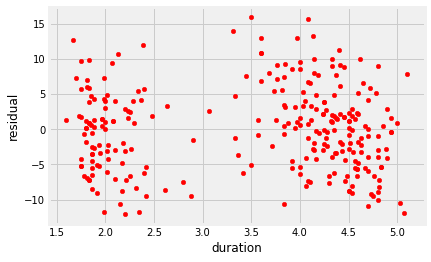

In [21]:
faithful_residuals.plot.scatter("duration", "residual", color="r")

There isn't really a pattern in the residuals, which confirms that it
was reasonable to try linear regression.  It's true that there are two
separate clouds; the eruption durations seemed to fall into two distinct
clusters.  But that's just a pattern in the eruption durations, not a
pattern in the relationship between eruption durations and waiting
times.

## 4. How accurate are different predictions?

Earlier, you should have found that the correlation is fairly close to
1, so the line fits fairly well on the training data.  That means the
residuals are overall small (close to 0) in comparison to the waiting
times.

We can see that visually by plotting the waiting times and residuals together:

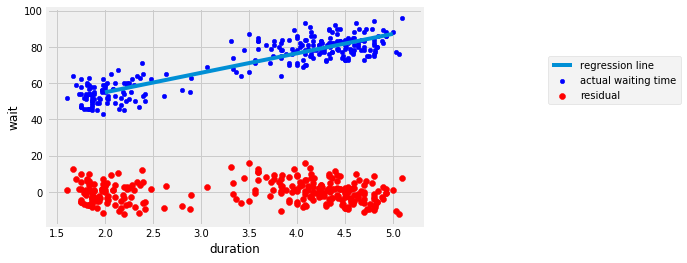

In [22]:
faithful_residuals.plot.scatter("duration", "wait", label="actual waiting time", color="blue")
plt.scatter(faithful_residuals["duration"], faithful_residuals["residual"], label="residual", color="r")
plt.plot([2, 5], [two_minute_predicted_waiting_time, five_minute_predicted_waiting_time], label="regression line")
plt.legend(bbox_to_anchor=(1.7,.8));

However, unless you have a strong reason to believe that the linear
regression model is true, you should be wary of applying your prediction
model to data that are very different from the training data.


## Question 1

In `faithful`, no eruption lasted exactly 0, 2.5, or 60 minutes.  Using
this line, what is the predicted waiting time for an eruption that lasts
0 minutes?  2.5 minutes?  An hour?

In [23]:
#<- zero_minute_predicted_waiting_time = ...
zero_minute_predicted_waiting_time = intercept
#<- two_point_five_minute_predicted_waiting_time = ...
two_point_five_minute_predicted_waiting_time = intercept + slope * 2.5
#<- hour_predicted_waiting_time = ...
hour_predicted_waiting_time = intercept * slope * 60

#<->
print_prediction(0, zero_minute_predicted_waiting_time)
print_prediction(2.5, two_point_five_minute_predicted_waiting_time)
print_prediction(60, hour_predicted_waiting_time)

After an eruption lasting 0 minutes, we predict you'll wait 33.47439759609108 minutes until the next eruption.
After an eruption lasting 2.5 minutes, we predict you'll wait 60.29850064245221 minutes until the next eruption.
After an eruption lasting 60 minutes, we predict you'll wait 21550.09657277785 minutes until the next eruption.


In [24]:
ok.grade('q4_1');

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Do you believe any of these values are reliable
predictions?  If you don't believe some of them, say why.

*Write your answer here, replacing this text.*

## 5. Divide and Conquer

It appears from the scatter diagram that there are two clusters of points: one
for durations around 2 and another for durations between 3.5 and 5. A vertical
line at 3 divides the two clusters.

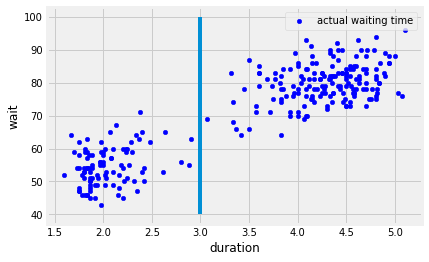

In [25]:
faithful.plot.scatter("duration", "wait", label="actual waiting time", color="blue")
plt.plot([3, 3], [40, 100]);

The `standardize` function from the lecture appears below, which returns
a table of values in standard units.

In [26]:
def standard_units(any_numbers):
    "Convert any array of numbers to standard units."
    return (any_numbers - np.mean(any_numbers)) / np.std(any_numbers)


def standardize(t):
    """Return table for which all columns of t converted to standard units."""
    t_su = pd.DataFrame()
    for col_name in t:
        t_su[col_name] = standard_units(t[col_name])
    return t_su

**Question 1**. Separately compute the regression coefficients r for all the
points with a duration below 3 **and then** for all the points with a duration
above 3. To do so, create a function that computes `r` from a table and pass it
two different tables of points, `below_3` and `above_3`.

In [27]:
def reg_coeff(t):
    """Return the regression coefficient for columns 0 & 1.

    Use .iloc[:, 0] to get values for columns 0, etc.
    """
    t_su = standardize(t)
#<-    ...
    return np.mean(t_su.iloc[:, 0] * t_su.iloc[:, 1])

#<- below_3 = ...
below_3 = faithful[faithful['duration'] < 3]
#<- above_3 = ...
above_3 = faithful[faithful['duration'] > 3]
#<->
below_3_r = reg_coeff(below_3)
above_3_r = reg_coeff(above_3)
print("For points below 3, r is", below_3_r, "; for points above 3, r is", above_3_r)

For points below 3, r is 0.2901895264925431 ; for points above 3, r is 0.3727822255707511


In [28]:
ok.grade('q5_1');

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



**Question 2.** Make separate lines to predict wait times.

Use `minimize` to calculate separate regression lines for durations below 3, and those above 3.

When you're done, the functions `wait_below_3` and `wait_above_3` below should
each use a different regression line to predict a wait time for a duration. The
first function should use the regression line for all points with duration
below 3. The second function should use the regression line for all points with
duration above 3.

In [29]:
#<- below_3_inter, below_3_slope = ...
below_3_inter, below_3_slope = minimize(
    ss_any_line,
    [30, 10],
    args=(below_3['duration'], below_3['wait'])).x
#<- above_3_inter, above_3_slope = ...
above_3_inter, above_3_slope = minimize(
    ss_any_line,
    [30, 10],
    args=(above_3['duration'], above_3['wait'])).x
#<->

def wait_below_3(duration):
    return below_3_inter + below_3_slope * duration


def wait_above_3(duration):
    return above_3_inter + above_3_slope * duration

In [30]:
ok.grade('q5_2');

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



The plot below shows two different regression lines, one for each cluster!

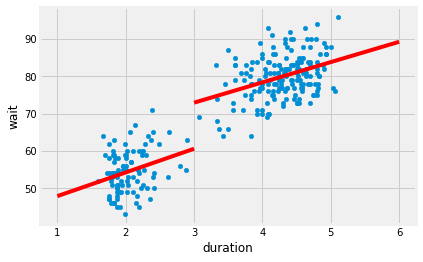

In [31]:
faithful.plot.scatter(0, 1)
plt.plot([1, 3], [wait_below_3(1), wait_below_3(3)], color='red')
plt.plot([3, 6], [wait_above_3(3), wait_above_3(6)], color='red');

**Question 3.** Write a function `predict_wait` that takes a `duration` and
returns the predicted wait time using the appropriate regression line,
depending on whether the duration is below 3 or greater than (or equal to) 3.

In [32]:
#<-
def predict_wait(duration):
    """ Return wait predicted by the matching regression line.

    Return wait predicted by the appropriate one of the two regression lines
    above.
    """
#<-
#<-    ...
    if duration < 3:
        return wait_below_3(duration)
    return wait_above_3(duration)

In [33]:
ok.grade('q5_3');

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



The predicted wait times for each point appear below.

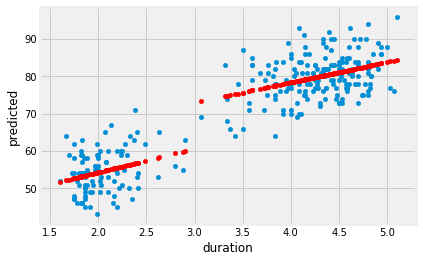

In [34]:
faith_predicted = faithful.copy()
faith_predicted['predicted'] = faithful['duration'].apply(predict_wait)
ax = faith_predicted.plot.scatter('duration', 'wait')  # Overlay on previous.
faith_predicted.plot.scatter('duration', 'predicted', ax=ax, color='red');

**Question 4.** Do you think the predictions produced by `predict_wait` would be more or less accurate than the predictions from the regression line you created in section 2? How could you tell?

*Write your answer here, replacing this text.*



## Done

You're finished with the assignment!  Be sure to...

- **run all the tests** (the next cell has a shortcut for that),
- **Save and Checkpoint** from the "File" menu.
- Finally, **restart** the kernel for this notebook, and **run all the cells**,
  to check that the notebook still works without errors.  Use the
  "Kernel" menu, and choose "Restart and run all".  If you find any
  problems, go back and fix them, save the notebook, and restart / run
  all again, before submitting.  When you do this, you make sure that
  we, your humble markers, will be able to mark your notebook.

In [35]:
# For your convenience, you can run this cell to run all the tests at once!
import os
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------